### Importowanie odpowiednich pakietów

In [282]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import category_encoders as ce
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer
from statistics import stdev

### Wczytanie danych (ograniczonych do 5000, żeby sprawnie poszło wywoływanie niektórych funkcji)

In [283]:
allegro = pd.read_csv("allegro-api-transactions.csv", nrows=5000)

In [284]:
allegro.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"


In [285]:
allegro.describe()

,lp,item_id,pay_option_on_delivery,pay_option_transfer,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2499.500000,5.755910e+09,0.883600,0.811000,80.638664,0.596800,7687.330600,0.013800,19425.797400
std,1443.520003,3.626123e+08,0.320736,0.391548,416.750815,0.490589,24971.428702,0.116672,35060.465513
min,0.000000,4.745307e+09,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1249.750000,5.527856e+09,1.000000,1.000000,9.500000,0.000000,7.000000,0.000000,1584.500000
50%,2499.500000,5.931229e+09,1.000000,1.000000,25.000000,1.000000,98.000000,0.000000,6972.000000
75%,3749.250000,6.059002e+09,1.000000,1.000000,69.000000,1.000000,942.000000,0.000000,20658.500000
max,4999.000000,6.099916e+09,1.000000,1.000000,27000.000000,1.000000,99999.000000,1.000000,292012.000000


In [286]:
allegro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   lp                      5000 non-null   int64  
 1   date                    5000 non-null   object 
 2   item_id                 5000 non-null   int64  
 3   categories              5000 non-null   object 
 4   pay_option_on_delivery  5000 non-null   int64  
 5   pay_option_transfer     5000 non-null   int64  
 6   seller                  5000 non-null   object 
 7   price                   5000 non-null   float64
 8   it_is_allegro_standard  5000 non-null   int64  
 9   it_quantity             5000 non-null   int64  
 10  it_is_brand_zone        5000 non-null   int64  
 11  it_seller_rating        5000 non-null   int64  
 12  it_location             5000 non-null   object 
 13  main_category           5000 non-null   object 
dtypes: float64(1), int64(8), object(5)
memor

# Zadanie 1

### It_location encoding

##### OneHotEncoder 

In [287]:

ce.OneHotEncoder(cols=[it]).fit_transform(allegro.drop(columns=["price"], axis=1), allegro.price)


,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,it_is_allegro_standard,it_quantity,it_is_brand_zone,...,it_location_1235,it_location_1236,it_location_1237,it_location_1238,it_location_1239,it_location_1240,it_location_1241,it_location_1242,it_location_1243,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,1,997,0,...,0,0,0,0,0,0,0,0,0,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,1,9288,0,...,0,0,0,0,0,0,0,0,0,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,1,895,0,...,0,0,0,0,0,0,0,0,0,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,0,971,0,...,0,0,0,0,0,0,0,0,0,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,1,950,0,...,0,0,0,0,0,0,0,0,0,"Odzież, Obuwie, Dodatki"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,2016-04-03 22:47:39,5715408276,"['Dom i Ogród', 'Narzędzia', 'Akcesoria i ospr...",1,1,mikosklep_pl,0,911,0,...,0,0,0,0,0,0,0,0,0,Dom i Ogród
4996,4996,2016-04-03 18:22:35,5715838676,"['Odzież, Obuwie, Dodatki', 'Odzież i bielizna...",1,1,kunte73,1,1,0,...,0,0,0,0,0,0,0,0,0,"Odzież, Obuwie, Dodatki"
4997,4997,2016-04-03 16:40:44,5716081276,"['Zdrowie', 'Zdrowie, medycyna', 'Sprzęt rehab...",1,1,matekch-firma,1,99946,0,...,0,0,0,0,0,0,0,0,0,Zdrowie
4998,4998,2016-04-03 14:47:20,5716081476,"['Sprzęt estradowy, studyjny i DJ-ski', 'Mikro...",1,1,wwwgoaudio_pl,1,992,0,...,0,0,0,0,0,0,0,0,0,"Sprzęt estradowy, studyjny i DJ-ski"


##### TargetEncoder 

In [288]:
it = "it_location"
main = "main_category"
allegroTarget = ce.TargetEncoder(cols=[it]).fit_transform(allegro.drop(columns=["price"], axis=1), allegro.price)
allegroTarget

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,1,997,0,50177,67.302015,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,1,9288,0,12428,67.302015,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,1,895,0,7389,137.667342,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,0,971,0,15006,35.280738,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,1,950,0,32975,38.338035,"Odzież, Obuwie, Dodatki"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,2016-04-03 22:47:39,5715408276,"['Dom i Ogród', 'Narzędzia', 'Akcesoria i ospr...",1,1,mikosklep_pl,0,911,0,7047,6.771116,Dom i Ogród
4996,4996,2016-04-03 18:22:35,5715838676,"['Odzież, Obuwie, Dodatki', 'Odzież i bielizna...",1,1,kunte73,1,1,0,45117,44.144902,"Odzież, Obuwie, Dodatki"
4997,4997,2016-04-03 16:40:44,5716081276,"['Zdrowie', 'Zdrowie, medycyna', 'Sprzęt rehab...",1,1,matekch-firma,1,99946,0,12201,29.491312,Zdrowie
4998,4998,2016-04-03 14:47:20,5716081476,"['Sprzęt estradowy, studyjny i DJ-ski', 'Mikro...",1,1,wwwgoaudio_pl,1,992,0,1468,335.311207,"Sprzęt estradowy, studyjny i DJ-ski"


##### Zdecydowaną przewagą TargetEncodingu jest to, że wykonuję się o wiele sprawniej. Używając OneHotEncoder na całym zbiorze danych nie byłem w stanie osiągnąć wyniku, gdyż ostateczny plik był bardzo ogromny 

### Main_category encoding

In [289]:
ce.OneHotEncoder(cols=["main_category"]).fit_transform(allegro.drop(columns=["price"], axis=1), allegro.price)


,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,it_is_allegro_standard,it_quantity,it_is_brand_zone,...,main_category_16,main_category_17,main_category_18,main_category_19,main_category_20,main_category_21,main_category_22,main_category_23,main_category_24,main_category_25
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,1,997,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,1,9288,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,1,895,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,0,971,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,1,950,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,2016-04-03 22:47:39,5715408276,"['Dom i Ogród', 'Narzędzia', 'Akcesoria i ospr...",1,1,mikosklep_pl,0,911,0,...,0,0,0,0,0,0,0,0,0,0
4996,4996,2016-04-03 18:22:35,5715838676,"['Odzież, Obuwie, Dodatki', 'Odzież i bielizna...",1,1,kunte73,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4997,4997,2016-04-03 16:40:44,5716081276,"['Zdrowie', 'Zdrowie, medycyna', 'Sprzęt rehab...",1,1,matekch-firma,1,99946,0,...,1,0,0,0,0,0,0,0,0,0
4998,4998,2016-04-03 14:47:20,5716081476,"['Sprzęt estradowy, studyjny i DJ-ski', 'Mikro...",1,1,wwwgoaudio_pl,1,992,0,...,0,0,0,0,0,0,0,0,1,0


In [290]:
ce.SumEncoder(cols=[main]).fit_transform(allegro.drop(columns=["price"], axis=1), allegro.price)

,intercept,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,it_is_allegro_standard,it_quantity,...,main_category_14,main_category_15,main_category_16,main_category_17,main_category_18,main_category_19,main_category_20,main_category_21,main_category_22,main_category_23
0,1,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,1,997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,1,9288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,1,895,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,0,971,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,1,950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,4995,2016-04-03 22:47:39,5715408276,"['Dom i Ogród', 'Narzędzia', 'Akcesoria i ospr...",1,1,mikosklep_pl,0,911,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,1,4996,2016-04-03 18:22:35,5715838676,"['Odzież, Obuwie, Dodatki', 'Odzież i bielizna...",1,1,kunte73,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,1,4997,2016-04-03 16:40:44,5716081276,"['Zdrowie', 'Zdrowie, medycyna', 'Sprzęt rehab...",1,1,matekch-firma,1,99946,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,1,4998,2016-04-03 14:47:20,5716081476,"['Sprzęt estradowy, studyjny i DJ-ski', 'Mikro...",1,1,wwwgoaudio_pl,1,992,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [291]:
ce.BinaryEncoder(cols=[main]).fit_transform(allegro.drop(columns=["price"], axis=1), allegro.price)

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category_0,main_category_1,main_category_2,main_category_3,main_category_4,main_category_5
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,1,997,0,50177,Warszawa,0,0,0,0,0,1
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,1,9288,0,12428,Warszawa,0,0,0,0,1,0
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,1,895,0,7389,Leszno,0,0,0,0,1,1
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,0,971,0,15006,Wola Krzysztoporska,0,0,0,1,0,0
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,1,950,0,32975,BIAŁYSTOK,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,2016-04-03 22:47:39,5715408276,"['Dom i Ogród', 'Narzędzia', 'Akcesoria i ospr...",1,1,mikosklep_pl,0,911,0,7047,Świątniki Górne,0,0,0,0,1,1
4996,4996,2016-04-03 18:22:35,5715838676,"['Odzież, Obuwie, Dodatki', 'Odzież i bielizna...",1,1,kunte73,1,1,0,45117,Koszalin,0,0,0,0,1,0
4997,4997,2016-04-03 16:40:44,5716081276,"['Zdrowie', 'Zdrowie, medycyna', 'Sprzęt rehab...",1,1,matekch-firma,1,99946,0,12201,Myślenice,0,1,0,0,0,0
4998,4998,2016-04-03 14:47:20,5716081476,"['Sprzęt estradowy, studyjny i DJ-ski', 'Mikro...",1,1,wwwgoaudio_pl,1,992,0,1468,Ozorków,0,1,1,0,0,0


##### 1) OneHotEncoding polega na stworzeniu kolumn odpowiadających każdej z kategorii, w przypadku gdy któryś z wystąpień ma określoną kategorie, to w miejscu danej kolumny-kategorii postawiona jest 1, natomiast w pozostałych 0. Z przyczyn zbyt dużego zapełnienia pamięci komputera nie jesteśmy w stanie go wywołać na słabszych sprzętach w przypadku niektórych ramek danych

##### 2) TargetEncoding bierze średnią wartość zmiennej celu dla danej kategorii i wrzuca wynik w kolumne, na której wykonywaliśmy TargetEncoding

##### 3) SumEncoding jest bardzo podobny do OneHotEncoding, ale w tym wypadku jedna z wartości posiada stałą wartość -1

##### 4) BinaryEncoding polega na zamienianiu każdego z integerów z OrdinalEncodingu na liczbe binarną, pozwala zaoszczedzic troche pamięci

# Zadanie 2

In [266]:
AllegroDroped = allegro.loc[:,["price","it_seller_rating","it_quantity"]]

In [267]:
AllegroDroped.head()

,price,it_seller_rating,it_quantity
0,59.99,50177,997
1,4.90,12428,9288
2,109.90,7389,895
3,18.50,15006,971
4,19.90,32975,950


In [268]:
import random
nan = np.nan

In [269]:
a = np.random.randint(low = 0,high = 5000,size = 500)
AllegroDropedTmp = AllegroDroped.copy(deep=True)
AllegroDropedTmp.loc[a,'it_seller_rating'] = nan
imputer = KNNImputer(n_neighbors=2, weights="uniform")
it_seller_rating_transformed = imputer.fit_transform(AllegroDropedTmp)

### Sprawdźmy, czy nasza tablica nie zawiera jakichś wartości

In [270]:
np.count_nonzero(np.isnan(it_seller_rating_transformed))


0

In [271]:
np.count_nonzero(np.isnan(AllegroDroped.it_seller_rating))


0

### Policzmy błąd średniokwadratowy

In [272]:
import sklearn.metrics
mean_squared_error(it_seller_rating_transformed[:, 1], AllegroDroped.it_seller_rating.to_numpy().tolist())

128682736.17095

### Powtórzmy eksperyment 10 razy

In [273]:
outputs = []
for i in range(10):
    np.random.seed(i)
    a= np.random.randint(low = 0,high = 5000,size = 500)
    AllegroDropedTmp = AllegroDroped.copy()
    AllegroDropedTmp.loc[a,'it_seller_rating'] = nan
    imputer = KNNImputer(n_neighbors=2, weights="uniform")
    it_seller_rating_transformed = imputer.fit_transform(AllegroDropedTmp)
    outputs.append(mean_squared_error(it_seller_rating_transformed[:, 1], AllegroDroped.it_seller_rating.to_numpy().tolist()))

In [274]:
outputs

[99903824.44815,
 106024517.35325,
 110817238.2475,
 134732052.94985,
 145250139.87,
 134060457.87325,
 112470492.1924,
 124377660.95245,
 80133443.768,
 95135872.44015]

### Wariancja standardowa:

In [275]:
np.std(outputs)

19217808.31361257

Text(0.5, 1.0, 'Błąd średniokwadratowy w kolejnym eksperymencie')

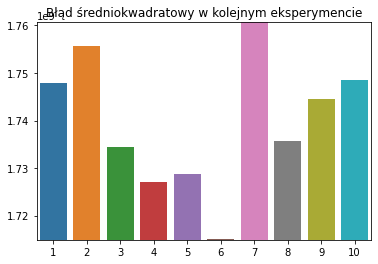

In [281]:
g = sns.barplot(x=list(range(1, 11)), y=outputs)
g.set(ylim=(min(outputs)-100000,max(outputs)))
g.set_title("Błąd średniokwadratowy w kolejnym eksperymencie")

### Usuńmy teraz dodatkowo 10% wartości z kolumny it_quantity

In [277]:
outputs = []
for i in range(10):
    np.random.seed(i)
    a = np.random.randint(low = 0,high = 5000,size = 500)
    b = np.random.randint(low = 0,high = 5000,size = 500)
    AllegroDropedTmp = AllegroDroped.copy(deep=True)
    AllegroDropedTmp.loc[a,'it_seller_rating'] = nan
    AllegroDropedTmp.loc[b,'it_quantity'] = nan
    imputer = KNNImputer(n_neighbors=2, weights="uniform")
    it_seller_rating_transformed = imputer.fit_transform(AllegroDropedTmp)
    outputs.append(mean_squared_error(it_seller_rating_transformed[:, [0, 1]], AllegroDroped[["it_seller_rating", "it_quantity"]].to_numpy().tolist()))

In [256]:
outputs

[1747897203.3122127,
 1755641123.9485378,
 1734422279.8254628,
 1727105828.6053376,
 1728764314.5978878,
 1714999534.3234377,
 1760657719.334313,
 1735706894.4887877,
 1744515888.4197128,
 1748468080.2498627]

### Wariancja standardowa:

In [257]:
np.std(outputs)

13388753.523721533

Text(0.5, 1.0, 'Błąd średniokwadratowy w kolejnym eksperymencie')

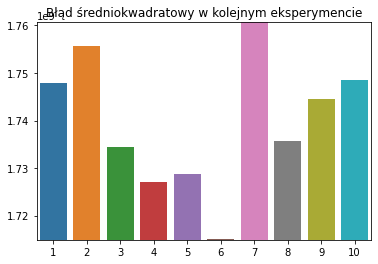

In [280]:
g = sns.barplot(x=list(range(1, 11)), y=outputs)
g.set(ylim=(min(outputs)-100000,max(outputs)))
g.set_title("Błąd średniokwadratowy w kolejnym eksperymencie")

Sądząc po błędzie średniokwadratowym oraz odchyleniu naszego błędu, nasza imputacja danych nie okazała się zbyt dokładna. Będzie to najprawdopodobniej zaburzało ostateczny wynik modelowania